# 캘리포니아 주택 가격

넘파이와 판다스 기본 설정

In [1]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, suppress=True)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 원래 60이 기본.
pd.options.display.max_rows = 20

In [2]:
import matplotlib.pyplot as plt

## 캘리포니아 데이터셋

1990년대 초에 캘리포니아 주를 20640 개 구역으로 쪼갠 후 구역별로 통계 자료를 조사한 데이터셋이다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/LA-USA01.png" width="600"></div>

구역별로 다음 10개 내용을 조사했다.

| 특성 | 의미 |
| :--- | :--- |
| `'longitude'` | 위도 |
| `'latitude'` | 경도 |
| `'housing_median_age'` | 건축물 중위연령 |
| `'total_rooms'` | 방의 총 개수 |
| `'total_bedrooms'` | 침실 총 개수 |
| `'population'` | 인구 |
| `'households'` | 가구수 |
| `'median_income'` | 중위소득 |
| `'median_house_value'` | 주택 중위가격 |
| `'ocean_proximity'` | 해안 근접도 |

### 캘리포니아 데이터셋 다운로드

아래 주소에 tgz 압축 파일로 저장되어 있다.
해당 파일을 다운로드해서 특정 폴더에 저장한 후에
압축을 풀면 csv 파일이 생성되며, 이를 데이터프레임으로 불러온다.

아래 `load_housing_data()` 함수가 이 과정을 모두 처리한다.

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

데이터셋 다운로드 후 데이터프레임으로 적재한다.

In [4]:
housing = load_housing_data()

### 데이터셋 기본 정보 확인

총 20640개의 데이터 샘플이 포함되며, 10개의 특성(열)을 포함한다.

In [5]:
housing.shape

(20640, 10)

In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


10개 특성의 이름은 다음과 같다.

In [7]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

`info()` 메서드를 이용하여 데이터셋 전체에 대한 기본 정보를 확인한다.

- `'total_bedrooms'` 특성: 207개의 결측치 포함
- `'ocean_proximity'` 특성: 수치형 데이터 아님

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`'ocean_proximity'` 특성은 구역별로 5개의 범주로 구분된 해안 근접도를 나타낸다.

| 해안근접도 | 의미 |
| :--- | :--- |
| Near Bay | 샌프란시스코의 Bay Area 근처 구역 |
| <1H OCEAN | 바다로부터 1시간 이내 거리 |
| INLAND | 내륙 |
| NEAR OCEAN | 해안가 |
| ISLAND | 섬 |

In [9]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

해안 근접도별 구역 수는 다음과 같다.

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 데이터 특성 살펴보기

### 위치 정보 시각화

경도와 위도 정보를 이용해서 구역의 분포를 살펴본다.

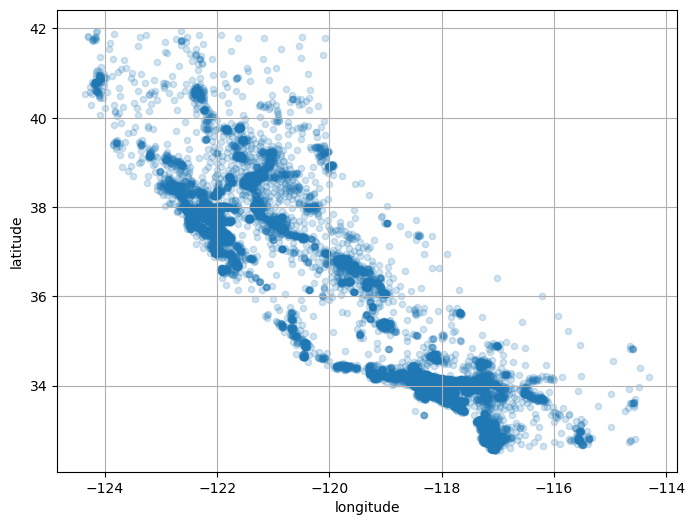

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2, figsize=(8, 6))
plt.show()

주택 중위가격을 색상으로 활용하면 다른 정보를 준다.

* `s=housing["population"] / 100`: 구역별 인구수에 비례해서 원의 크기 지정
* `c="median_house_value"`: 주택 중간 가격을 색상 지정에 이용
* `cmap="turbo"`: [colormap 지정](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

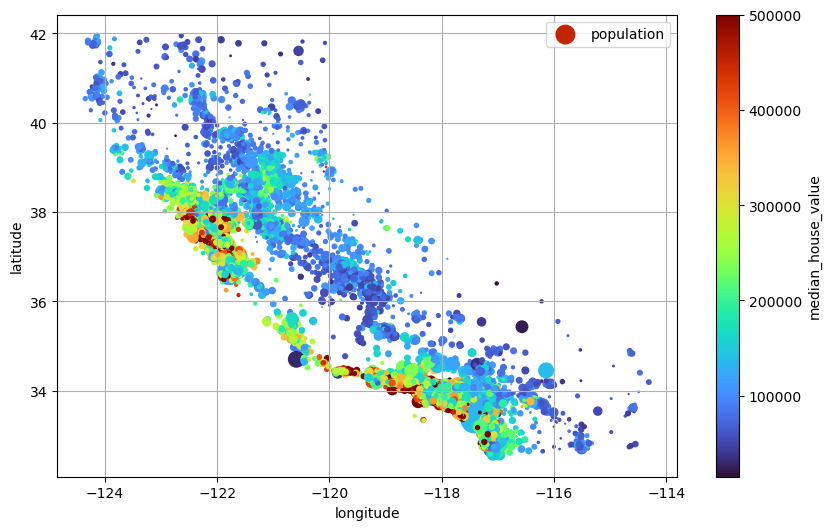

In [12]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", 
             cmap="turbo", 
             colorbar=True,
             legend=True, 
             sharex=False, 
             figsize=(10, 6))
plt.show()

캘리포니아 실제 지도위에 그래프를 그린다.

In [13]:
# 캘리포니아 지도 다운로드

IMAGES_PATH = Path() / "images"
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

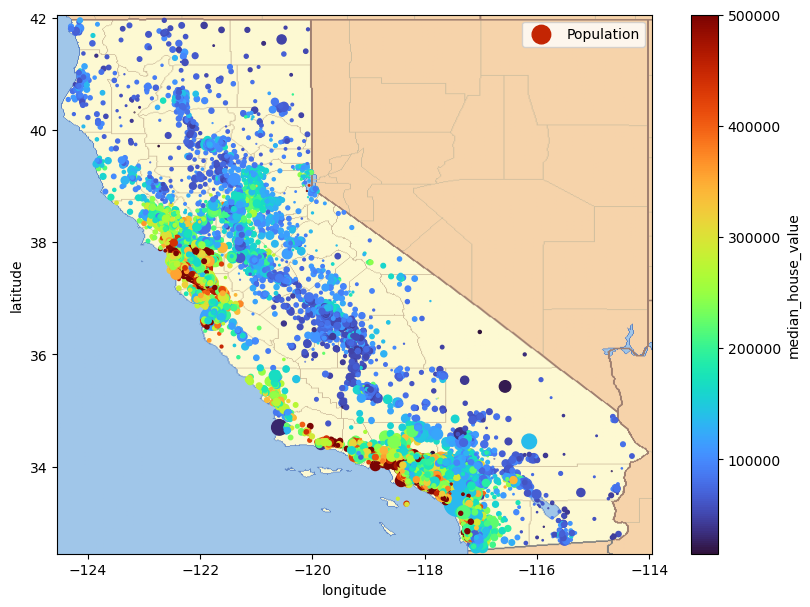

In [14]:
# 위도/경도를 이용한 구역별 인구 산포도
housing.plot(kind="scatter", 
                     x="longitude", 
                     y="latitude",
                     s=housing["population"] / 100, label="Population",
                     c="median_house_value", 
                     cmap="turbo", 
                     colorbar=True,
                     legend=True, 
                     sharex=False, 
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05  # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

해안 근접도에 따른 구역 위치를 확인한다.
이를 위해 해안 근접도 특성을 정수화 한다.

* `c=housing["ocean_p"]`: 0~4로 변환된 해안 근접도

| 해안 근접도 | 숫자 |
| :---: | :---: |
| Near Bay | 0 |
| <1H Ocean | 1 |
|INLAND | 2 |
| Near Ocean | 3 |
| ISLAND | 4 |

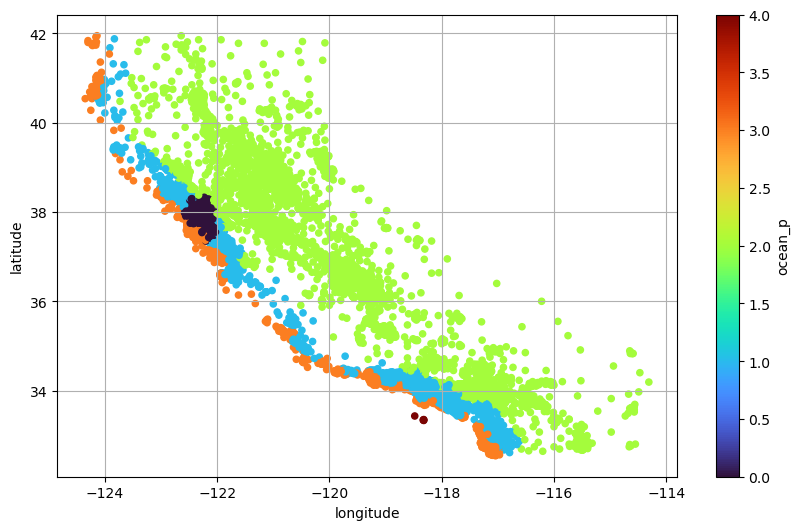

In [15]:
housing["ocean_p"] = pd.factorize(housing["ocean_proximity"])[0]

housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True,
             c="ocean_p", 
             cmap="turbo", 
             colorbar=True,
             legend=True, 
             sharex=False, 
             figsize=(10, 6))
plt.show()

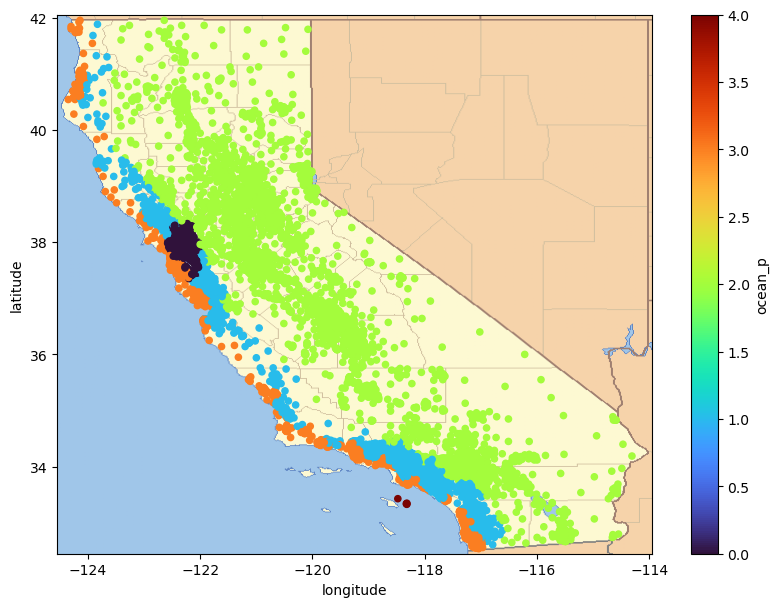

In [16]:
# 위도/경도를 이용한 구역별 인구 산포도
housing.plot(kind="scatter", 
                     x="longitude", 
                     y="latitude",
                     c="ocean_p", 
                     cmap="turbo", 
                     colorbar=True,
                     legend=True, 
                     sharex=False, 
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05  # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

### 특성별 히스토그램

`hist()` 메서드는 수치형 특성(라벨)에 대해 히스토그램을 그린다.
여기서는 해안 근접도를 제외한 9개의 특성에 대한 히스토그램을 그린다.

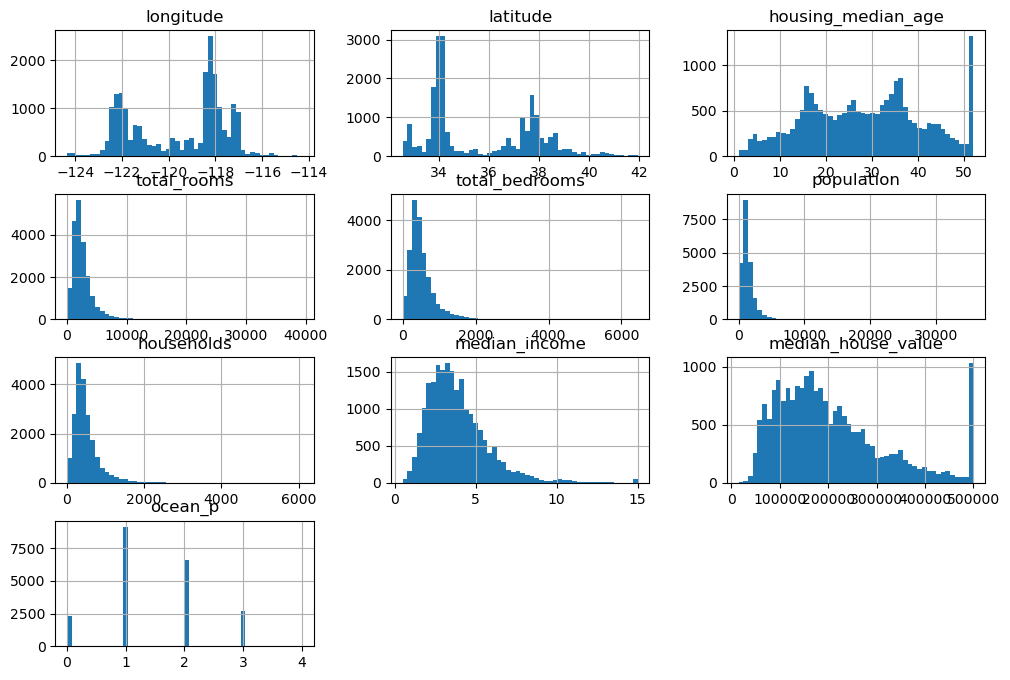

In [17]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

### 중위소득 막대그래프

`'median_income'` 특성의 히스토그램은 다음과 같다.

<Axes: >

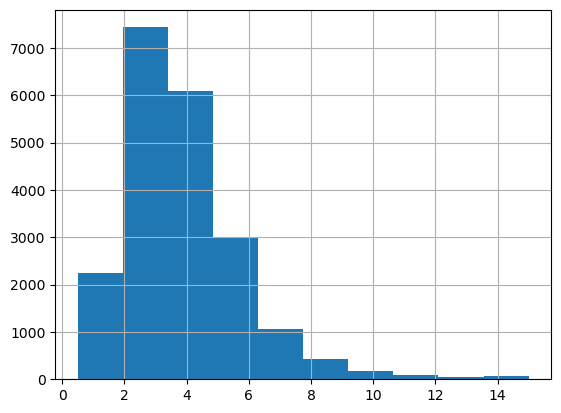

In [18]:
housing['median_income'].hist()

중위소득을 구간의 크기를 1.5 정도로 총 5개 구간으로 쪼개 후 각 구간에 대해 1, 2, 3, 4, 5의 라벨을 사용한다.

| 구간 | 라벨 |
| :---: | :---: |
| 1.5 이하 | 1 |
| (1.5, 3.0] | 2 |
| (3.0. 4.5] | 3 |
| (4.5, 6.0] | 4 |
| 6.0 초과 | 5 |

In [19]:
bins=[0., 1.5, 3.0, 4.5, 6., np.inf]

housing_income_cat = pd.cut(housing["median_income"],
                            bins=bins,
                            labels=[1, 2, 3, 4, 5])

housing_income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

구간에 속하는 구역의 수를 막대그래프로 그린다.

In [20]:
housing_income_cat_sorted_index = housing_income_cat.value_counts().sort_index()
housing_income_cat_sorted_index

1     822
2    6581
3    7236
4    3639
5    2362
Name: median_income, dtype: int64

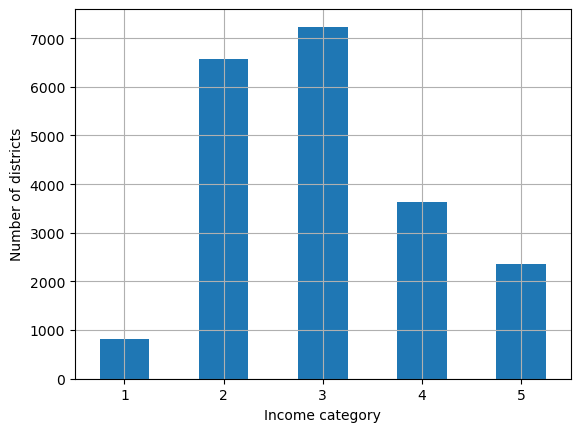

In [21]:
housing_income_cat_sorted_index.plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### 특성별 상관관계

In [22]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_p
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_p,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


주택 중위가격과 기타 특성들 사이의 상관관계는 다음과 같다.
아래 코드는 상관관계가 높은 순서대로 정렬한다.

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_p              -0.210600
Name: median_house_value, dtype: float64

주택 중위가격, 중위소득, 건축물 중위연령

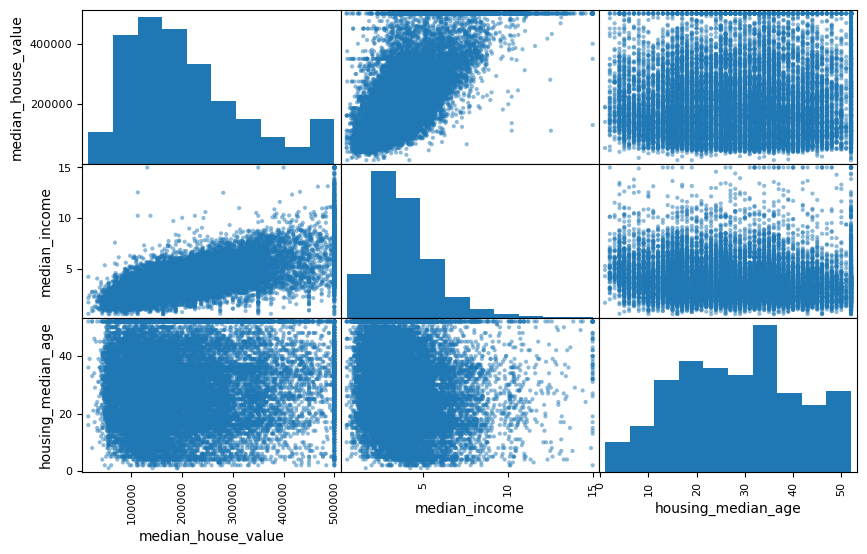

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 6))
plt.show()

건축물 중위연령, 즉 건물이 언제 지어졌는지와 주택 사이의 관계는 없어 보인다.
반면에 중위소득과 주택 중위가격 사이의 상관관계가 가장 많이 있어 보인다.
따로 확대해서 보면 다음과 같다.

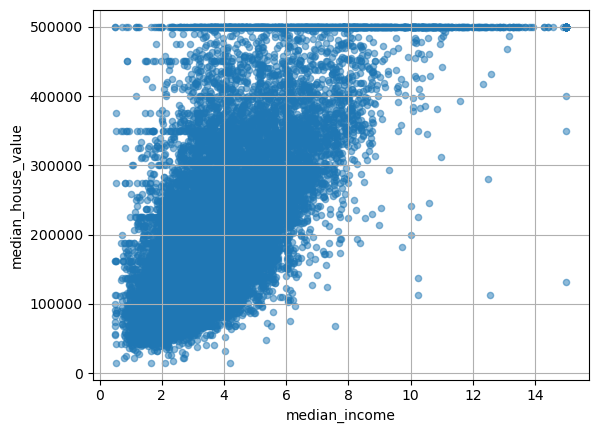

In [25]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value",
             alpha=0.5, 
             grid=True)
plt.show()

주택 중위가격이 50만 달러에 해당한느 데이터가 좀 이상하다. 
위 그림에서처럼 칼로 자른 듯한 데이터는 현실에서는 존재하지 않는다.
아마도 50만 달러 이상은 모두 50만 달러로 자른 것 같다.

이런 경우엔 해당 데이터를 삭제하는 게 좋다.
`value_counts()` 메서드를 이용하여 확인하면 정확히 50만1달러 샘플이 965개 있다
즉, 50만 달러를 초과하는 주택은 50만1달러로 통일한 것으로 보인다.

In [26]:
housing.median_house_value.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
41000.0       1
328200.0      1
300500.0      1
487500.0      1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

주택 중위소득이 50만1달러인 샘플은 삭제한다.

In [27]:
mask = housing.median_house_value != 500001

In [28]:
housing = housing[mask]

50만1달러 주택은 모두 제외시켰다.

In [29]:
housing.median_house_value.value_counts()

137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
           ... 
41000.0       1
328200.0      1
300500.0      1
487500.0      1
47000.0       1
Name: median_house_value, Length: 3841, dtype: int64

In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_p
count,19675.000000,19675.000000,19675.000000,19675.000000,19475.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,-119.563192,35.651780,28.386277,2619.763659,539.645751,1440.812198,501.186023,3.676717,192477.921017,1.474460
std,2.006108,2.149802,12.509113,2181.348207,422.413200,1143.648725,383.264636,1.570272,97711.509613,0.844163
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526800,116600.000000,1.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450000,173800.000000,1.000000
75%,-117.990000,37.730000,37.000000,3120.000000,648.000000,1746.000000,606.000000,4.582600,248200.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,4.000000


## 데이터 전처리

### 결측치 처리

In [17]:
null_rows_idx = housing.isnull().any(axis=1)

In [18]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [19]:
housing.loc[null_rows_idx].shape

(207, 10)

In [20]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [21]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,INLAND


해안근접도 특성 원-핫 인코딩

In [22]:
ocean_proximity = housing.ocean_proximity
ocean_proximity.head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [31]:
proximity_index = ocean_proximity.value_counts().sort_index().index
proximity_index

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [28]:
one_hot = np.eye(5)
one_hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [40]:
d = dict(zip(proximity_index, one_hot))
d

{'<1H OCEAN': array([1., 0., 0., 0., 0.]),
 'INLAND': array([0., 1., 0., 0., 0.]),
 'ISLAND': array([0., 0., 1., 0., 0.]),
 'NEAR BAY': array([0., 0., 0., 1., 0.]),
 'NEAR OCEAN': array([0., 0., 0., 0., 1.])}

In [46]:
m = np.zeros((housing.shape[0], 5))
m

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [47]:
m[0]

array([0., 0., 0., 0., 0.])

In [48]:
ocean_proximity.iloc[0]

'NEAR BAY'

In [49]:
for idx in range(m.shape[0]):
    m[idx] = d[ocean_proximity.iloc[idx]]

In [50]:
m

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
ocean_proximity.tail()

20635    INLAND
20636    INLAND
20637    INLAND
20638    INLAND
20639    INLAND
Name: ocean_proximity, dtype: object

In [68]:
ocean_proximity_df = pd.DataFrame(m, columns=proximity_index)
ocean_proximity_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [69]:
housing_numerical = housing.drop("ocean_proximity", axis=1)
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [73]:
pd.concat([housing_numerical, ocean_proximity_df], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


수치형 데이터 스케일링: 표준화

In [62]:
mean_df = housing_numerical.mean()
mean_df

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           536.838857
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [63]:
std_df = housing_numerical.std()
std_df

longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           419.391878
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

In [67]:
housing_numerical.sub(mean_df, axis=1).div(std_df, axis=1).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.557496e-15,-1.045159e-15,3.580254e-17,2.607733e-17,-9.811273e-17,-1.170468e-17,7.057232e-17,5.749062e-17,-1.001783e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.385935e+00,-1.447533e+00,-2.196127e+00,-1.207254e+00,-1.277657e+00,-1.256092e+00,-1.303952e+00,-1.774256e+00,-1.662601e+00
25%,-1.113182e+00,-7.967694e-01,-8.453727e-01,-5.445566e-01,-5.718729e-01,-5.637952e-01,-5.742155e-01,-6.881019e-01,-7.561450e-01
50%,5.389006e-01,-6.422715e-01,2.864502e-02,-2.332048e-01,-2.428251e-01,-2.291262e-01,-2.368104e-01,-1.767908e-01,-2.353280e-01
75%,7.784775e-01,9.729330e-01,6.642943e-01,2.347971e-01,2.537272e-01,2.644885e-01,2.758360e-01,4.592952e-01,5.014851e-01
max,2.625216e+00,2.957996e+00,1.856137e+00,1.681517e+01,1.408745e+01,3.024960e+01,1.460117e+01,5.858144e+00,2.540349e+00


수치형 데이터 스케일링: 정규화

In [74]:
max_df = housing_numerical.max()
max_df

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [75]:
min_df = housing_numerical.min()
min_df

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

In [76]:
max_df - min_df

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

In [77]:
housing_numerical.sub(min_df, axis=1).div(max_df - min_df, axis=1).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.395579
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.215671
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


수치형 데이터 스케일링: 로그 변환

In [91]:
housing_numerical[["total_rooms", "population","households", "median_income", "median_house_value"]].apply(np.log)

,total_rooms,population,households,median_income,median_house_value
0,1.913966,1.753461,1.576146,0.751080,13.022764
1,2.182417,2.052024,1.951186,0.749728,12.789684
2,1.986637,1.825609,1.644061,0.684117,12.771671
3,1.967101,1.844409,1.684373,0.548372,12.740517
4,2.000736,1.846378,1.715027,0.297943,12.743151
...,...,...,...,...,...
20635,2.003853,1.907961,1.757701,-0.809955,11.265745
20636,1.878974,1.770694,1.555235,-0.063199,11.252859
20637,2.043874,1.933654,1.803480,-0.633694,11.432799
20638,2.018673,1.888281,1.767308,-0.470900,11.346871


In [92]:
housing_numerical[["total_rooms", "population","households", "median_income", "median_house_value"]] = housing_numerical[["total_rooms", "population","households", "median_income", "median_house_value"]].apply(np.log)

In [93]:
housing_numerical.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.048500e+04,20640.000000
mean,-119.569704,35.631861,28.639486,2.026368,536.838857,1.943021,-inf,-inf,12.084884
std,2.003532,2.135952,12.585558,0.109920,419.391878,0.117550,NaN,NaN,0.569134
min,-124.350000,32.540000,1.000000,-0.366513,1.000000,0.094048,-inf,-inf,9.615739
25%,-121.800000,33.930000,18.000000,1.984824,297.000000,1.897354,1.728960e+00,-5.227520e-02,11.691908
50%,-118.490000,34.260000,29.000000,2.036334,435.000000,1.954634,1.794043e+00,2.365438e-01,12.099044
75%,-118.010000,37.710000,37.000000,2.086234,643.250000,2.008614,1.857115e+00,4.445482e-01,12.486447
max,-114.310000,41.950000,52.000000,2.358917,6445.000000,2.349698,2.164826e+00,9.962314e-01,13.122365
